In [36]:
# We will see how to apply 'Lasso_Regression' using sklearn.   

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

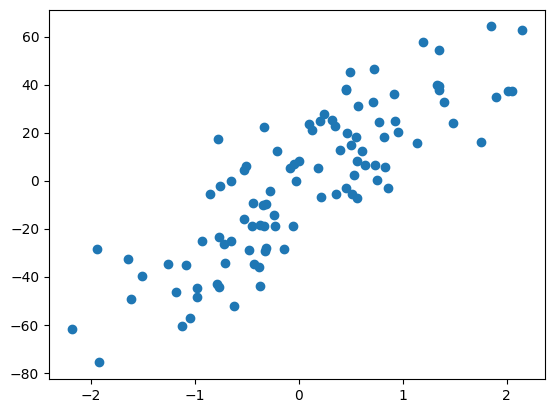

In [27]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

plt.scatter(X,y)

In [28]:
# Apply simple LR here

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score

print("R2_score:", r2_score(y_test,y_pred))

R2_score: 0.7130986116443623


In [29]:
# finding slope and intercept values

print(reg.intercept_)
print(reg.coef_)

-2.379948353231343
[28.11358072]


C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+04, tolerance: 7.809e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

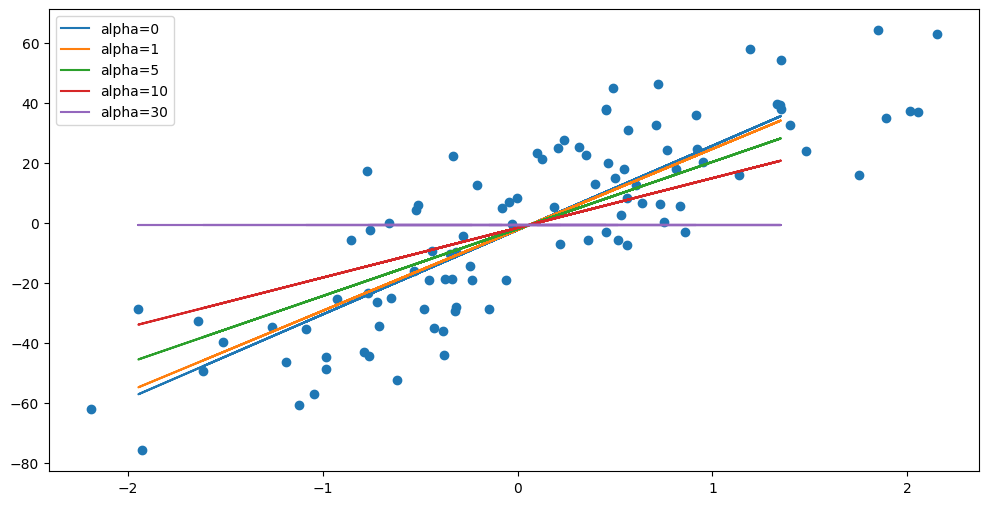

In [30]:
# Now, we check for different values of 'alpha' on 'Lasso_Regression'

alphas = [0,1,5,10,30]

plt.figure(figsize=(12,6))
plt.scatter(X,y)

for i in alphas:

    L=Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test, L.predict(X_test), label='alpha={}'.format(i))
plt.legend()
plt.show()     

In [31]:
# In LR, coefficient doesn't equal to zero, it approaches to zero....
# But, in case of Lasso_Regression, it is equal to zero.(see in fig.)

In [32]:
# so,On increasing value of 'alpha', slope(m) decreases.

# alpha=0 → behaves like plain Linear Regression (no penalty). Fit is very flexible.
# alpha=1 → slight regularization, some coefficients shrink a little.
# alpha=5,10 → stronger regularization, curve becomes smoother, less variance.
# alpha=30 → very strong penalty, most coefficients shrink toward 0 → model becomes almost flat (case of 'under-fitting').

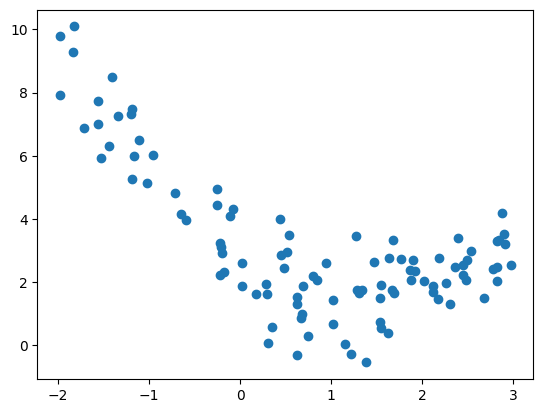

In [33]:
# Take one more case, where we apply 'Polynomial_Regression' using "Lasso"

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1,x2)
plt.show()

C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.242e+01, tolerance: 5.214e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

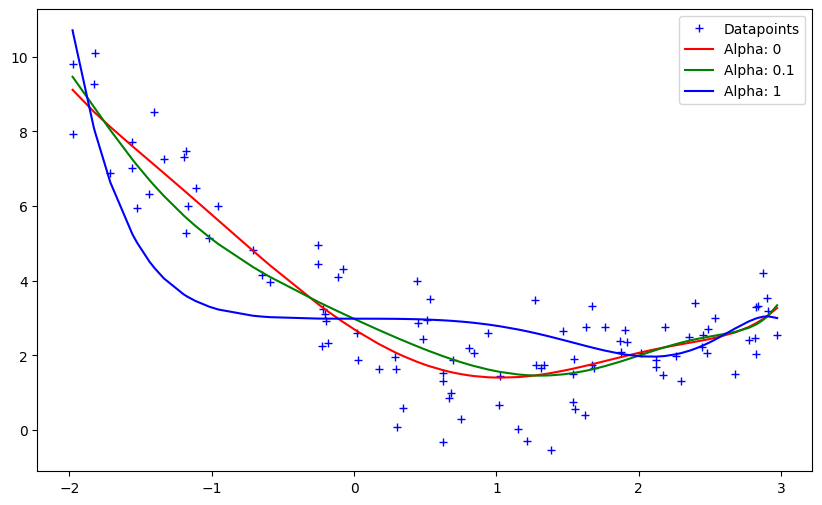

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [35]:
# so here, "red_line" shows normal 'Linear_Regression'.
# "green_line" is balanced among all.
# "blue_line" shows the case of 'under-fitting'.